In [53]:
# ===============================================================
# 01_eda.ipynb
# Module 1: Data Preprocessing & EDA (Adapted for your dataset)
# ===============================================================

# STEP 1: Install dependencies
!pip install pandas numpy matplotlib seaborn

In [54]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# STEP 2: Load dataset (update path as needed)
df = pd.read_csv("../data/raw/air_quality.csv")

print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (29531, 16)
        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


In [56]:
# STEP 3: Convert 'Date' column (not 'Last Updated') to datetime and set index
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.set_index('Date').sort_index()
print("After setting datetime index:")
print(df.head())

After setting datetime index:
                 City   PM2.5    PM10     NO    NO2     NOx    NH3     CO  \
Date                                                                        
2015-01-01  Ahmedabad     NaN     NaN   0.92  18.22   17.15    NaN   0.92   
2015-01-01    Chennai     NaN     NaN  16.30  15.39   22.68   4.59   1.17   
2015-01-01      Delhi  313.22  607.98  69.16  36.39  110.59  33.85  15.20   
2015-01-01    Lucknow     NaN     NaN   2.11  13.46    4.57    NaN  12.15   
2015-01-01     Mumbai     NaN     NaN    NaN    NaN   27.38    NaN   0.00   

               SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
Date                                                                    
2015-01-01   27.64  133.36     0.00     0.02    0.00    NaN        NaN  
2015-01-01    9.20   11.35     0.17      NaN     NaN    NaN        NaN  
2015-01-01    9.25   41.68    14.36    24.86    9.84  472.0     Severe  
2015-01-01  169.57   25.92     1.35     3.93     NaN    NaN      

In [65]:
# Convert pollutant columns to numeric to handle conversion issues early
pollutant_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
for col in pollutant_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [67]:
# Interpolate only numeric columns and leave others untouched
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].interpolate(method='linear', limit_direction='both')

In [68]:
# STEP 6: Handle outliers by clipping using IQR method
for col in pollutant_cols:
    if col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        df[col] = df[col].clip(lower, upper)

In [69]:
# STEP 7: Add date-based features for analysis
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year

In [70]:
# STEP 8: Save cleaned dataset
df.to_csv("../data/processed/air_quality_cleaned.csv")
print("✅ Cleaned dataset saved to ../data/processed/air_quality_cleaned.csv")

✅ Cleaned dataset saved to ../data/processed/air_quality_cleaned.csv


In [71]:
# Add extra date-time features directly on df (no df_daily)
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year

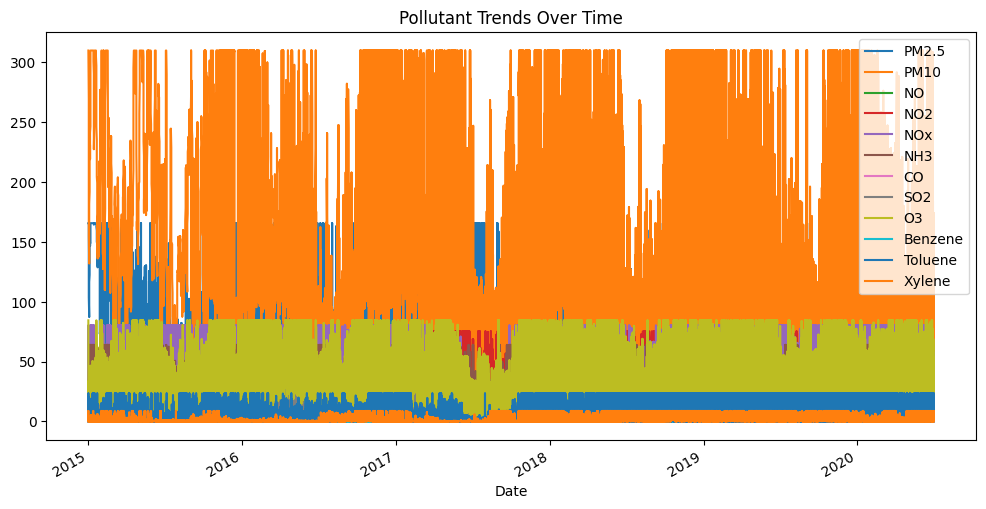

In [72]:
# ===============================================================
# EDA (Exploratory Data Analysis)
# ===============================================================

# 1. Line plots for pollutants over time
plt.figure(figsize=(12,6))
for col in pollutant_cols:
    if col in df.columns:
        df[col].plot(label=col)
plt.title("Pollutant Trends Over Time")
plt.legend()
plt.show()

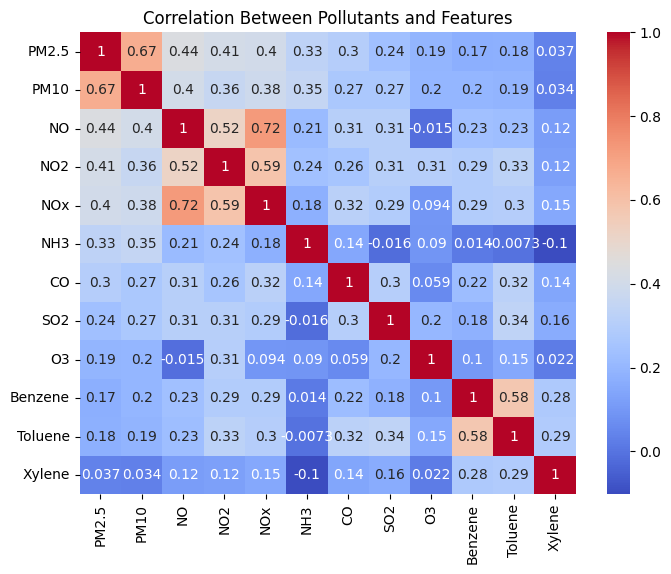

In [73]:
# 2. Correlation heatmap among pollutants and features
plt.figure(figsize=(8,6))
sns.heatmap(df[pollutant_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Pollutants and Features")
plt.show()

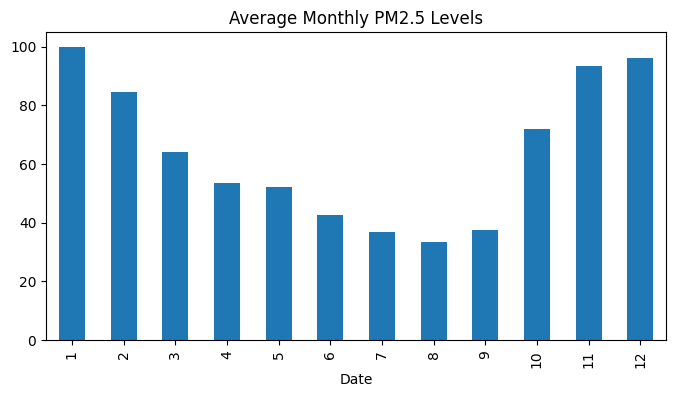

In [74]:
# 3. Seasonal analysis: Monthly averages for PM2.5 (example)
if "PM2.5" in df.columns:
    df.groupby(df.index.month)["PM2.5"].mean().plot(
        kind="bar", figsize=(8,4), title="Average Monthly PM2.5 Levels"
    )
    plt.show()

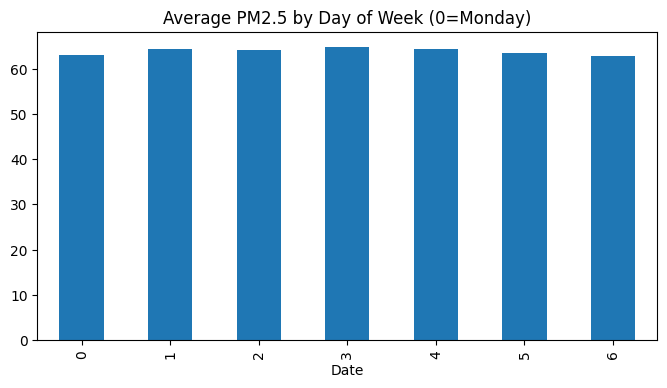

In [75]:
# 4. Weekly pattern: Day of week averages for PM2.5 (example)
if "PM2.5" in df.columns:
    df.groupby(df.index.dayofweek)["PM2.5"].mean().plot(
        kind="bar", figsize=(8,4), title="Average PM2.5 by Day of Week (0=Monday)"
    )
    plt.show()

In [76]:
# 5. Dataset summary
print("Final cleaned dataset shape:", df.shape)
print(df.describe())

Final cleaned dataset shape: (29531, 18)
              PM2.5          PM10            NO           NO2           NOx  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      63.926073    122.965133     14.538288     27.326784     28.639254   
std       44.863709     76.383485     12.036912     19.187162     22.335793   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       30.190000     64.853409      5.832500     12.290000     11.830000   
50%       50.410000    104.633333     10.010000     22.070000     22.920000   
75%       84.367500    162.870000     19.920000     37.485000     39.170000   
max      165.633750    309.894886     41.051250     75.277500     80.180000   

                NH3            CO           SO2            O3       Benzene  \
count  29531.000000  29531.000000  29531.000000  29531.000000  29531.000000   
mean      23.106627      1.072481     11.712215     33.962301      2.004723   
std       